## Reading the file for analysis

In [89]:
import pandas as pd
import nltk

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

cleaned_orders_reviews_df = pd.read_csv("clean_data/cleaned_orders_reviews.csv")

cleaned_orders_reviews_df.head()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\T470\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\T470\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\T470\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


review_id                          order_id  \
0  7bc2406110b926393aa56f80a40eba40  73fc7af87114b39712e6da79b0a377eb   
1  80e641a11e56f04c1ad469d5645fdfde  a548910a1c6147796b98fdf73dbeba33   
2  228ce5500dc1d8e020d8d1322874b6f0  f9e4b658b201a9f2ecdecbb34bed034b   
3  e64fb393e7b32834bb789ff8bb30750e  658677c97b385a9be170737859d3511b   
4  f7c4243c7fe1938f181bec41a392bdeb  8e6bfb81e283fa7e4f11123a3fb894f1   

   review_score review_comment_title  \
0             4                  NaN   
1             5                  NaN   
2             5                  NaN   
3             5                  NaN   
4             5                  NaN   

                              review_comment_message review_creation_date  \
0                                                NaN  2018-01-18 00:00:00   
1                                                NaN  2018-03-10 00:00:00   
2                                                NaN  2018-02-17 00:00:00   
3              Recebi bem antes do prazo estipulado.  2017-04-21 00:00:00   
4  Parabéns lojas lannister adorei comprar pela I...  2018-03-01 00:00:00   

  review_answer_timestamp                             cleaned_review_comment  \
0     2018-01-18 21:46:59                                                NaN   
1     2018-03-11 03:05:13                                                NaN   
2     2018-02-18 14:36:24                                                NaN   
3     2017-04-21 22:02:06              Recebi bem antes do prazo estipulado.   
4     2018-03-02 10:26:53  Parabéns lojas lannister adorei comprar pela I...   

                           translated_review_comment translated_comment_title  
0                                                NaN                      NaN  
1                                                NaN                      NaN  
2                                                NaN                      NaN  
3  I received it well before the stipulated deadl...                      NaN  
4  Congratulations lannister stores I loved shopp...                      NaN

## Tokenization

tokenization is the first step in text analytics where it is the process fo breaking down the text into smaller chunks of words/sentence

## Attempting Sentence Tokenization

Breaks paragraphs into sentences

In [90]:
from nltk.tokenize import sent_tokenize

for idx, row in cleaned_orders_reviews_df.iterrows():
    translated_review_value=row['translated_review_comment']
    if pd.notnull(translated_review_value):
        tokenized_sent = sent_tokenize(translated_review_value)
        print(tokenized_sent)
        print('number of sentences:' + str(len(tokenized_sent)))





['I received it well before the stipulated deadline.']
number of sentences:1
['Congratulations lannister stores I loved shopping online, safe and practical Congratulations to everyone, happy Easter']
number of sentences:1
['efficient device.', 'On the website the brand of the device is printed as 3disinfector and when it arrives it has a different name...update with the correct brand as it is the same device']
number of sentences:2
["But a little slow...for the price, it's good."]
number of sentences:1
['Reliable seller, ok product and delivery on time.']
number of sentences:1
['I WOULD LIKE TO KNOW WHAT HAPPENED, I ALWAYS RECEIVED IT AND THIS PURCHASE NOW DISAPPOINTED ME']
number of sentences:1
['Terrible']
number of sentences:1
['Store note 10']
number of sentences:1
['thank you for the attention you gave me']
number of sentences:1
['The purchase was made easily.', 'Delivery was made well before the deadline given.', 'The product has already started to be used and to date, without an

## Word tokenization
breaks paragraph into individual words and store it in the list **tokenized_words**


In [91]:
# Enter codes here
from nltk.tokenize import word_tokenize
full_tokenized_words=[]

for idx, row in cleaned_orders_reviews_df.iterrows():
    translated_review_value=row['translated_review_comment']
    if pd.notnull(translated_review_value):
        tokenized_words = word_tokenize(translated_review_value)
        full_tokenized_words.append(tokenized_words)
        # print(tokenized_words)
        # print('number of words:' + str(len(tokenized_words)))


print(len(full_tokenized_words))

41601


Looping through the reviews and crate a word list for visualization. At the same time do a case normalization to convert to lower case

In [92]:

#Loop through all reviews and tokenize into words
all_words= [word.lower() for sentence in cleaned_orders_reviews_df['translated_review_comment'] if pd.notnull(sentence) for word in word_tokenize(sentence)]


#print the first 10 words
print(all_words[:50])

['i', 'received', 'it', 'well', 'before', 'the', 'stipulated', 'deadline', '.', 'congratulations', 'lannister', 'stores', 'i', 'loved', 'shopping', 'online', ',', 'safe', 'and', 'practical', 'congratulations', 'to', 'everyone', ',', 'happy', 'easter', 'efficient', 'device', '.', 'on', 'the', 'website', 'the', 'brand', 'of', 'the', 'device', 'is', 'printed', 'as', '3disinfector', 'and', 'when', 'it', 'arrives', 'it', 'has', 'a', 'different', 'name']


## Create Frequency Distribution of all words
Frequency distribution will calculate the number of occurence of each word in the entire list of words.

<FreqDist with 11265 samples and 640550 outcomes>

Top 10 most frequently occurring words
[('the', 39400), ('i', 33209), ('.', 32493), (',', 29349), ('it', 19969), ('product', 18921), ('and', 16629), ('!', 10757), ('to', 10576), ('was', 9247)]

Top 10 least frequently occurring words
[('21/02', 1), ('10/04/16', 1), ('11/25/16', 1), ('well-cared', 1), ('2019', 1), ('10/21/2017', 1), ('propia', 1), ('polycarpo', 1), ('gomes', 1), ('celtic/prisma/meriva', 1)]


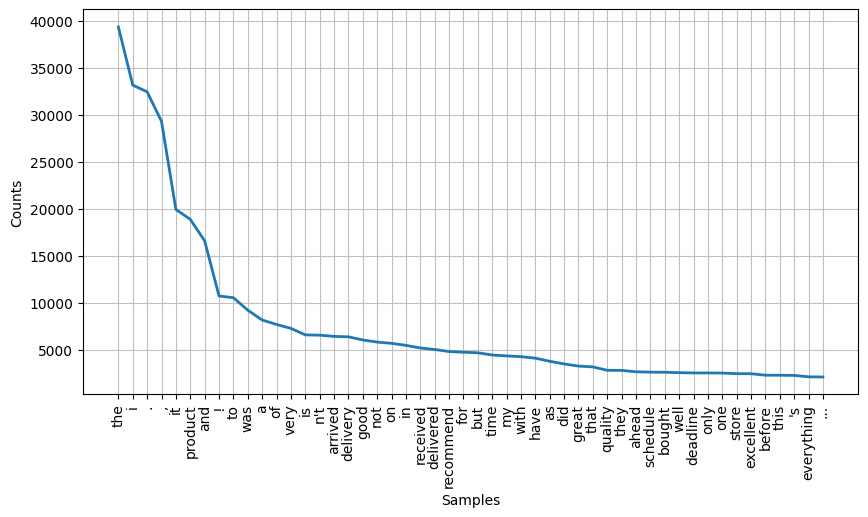

In [93]:
#Import Matplotlib Libary
import matplotlib.pyplot as plt
#Import frequency distribution
from nltk.probability import FreqDist

# calculate the number of occurence of each word in the entire list of words
all_words_frequency = FreqDist(all_words)
print (all_words_frequency)

# print 10 most frequently occurring words
print ("\nTop 10 most frequently occurring words")
print (all_words_frequency.most_common(10))

# print 10 least frequently occurring words
print ("\nTop 10 least frequently occurring words")
print (all_words_frequency.most_common()[-10:])


# create a function to plot the frequency, make it a function as we will be re-using it later.
def plot_frequency(freq):
    plt.figure(figsize=(10,5))
    freq.plot(50, cumulative=False)
    plt.show()

plot_frequency(all_words_frequency)

In [94]:
print (len(all_words_frequency))

11265


## Visalizing with WordCloud

11265


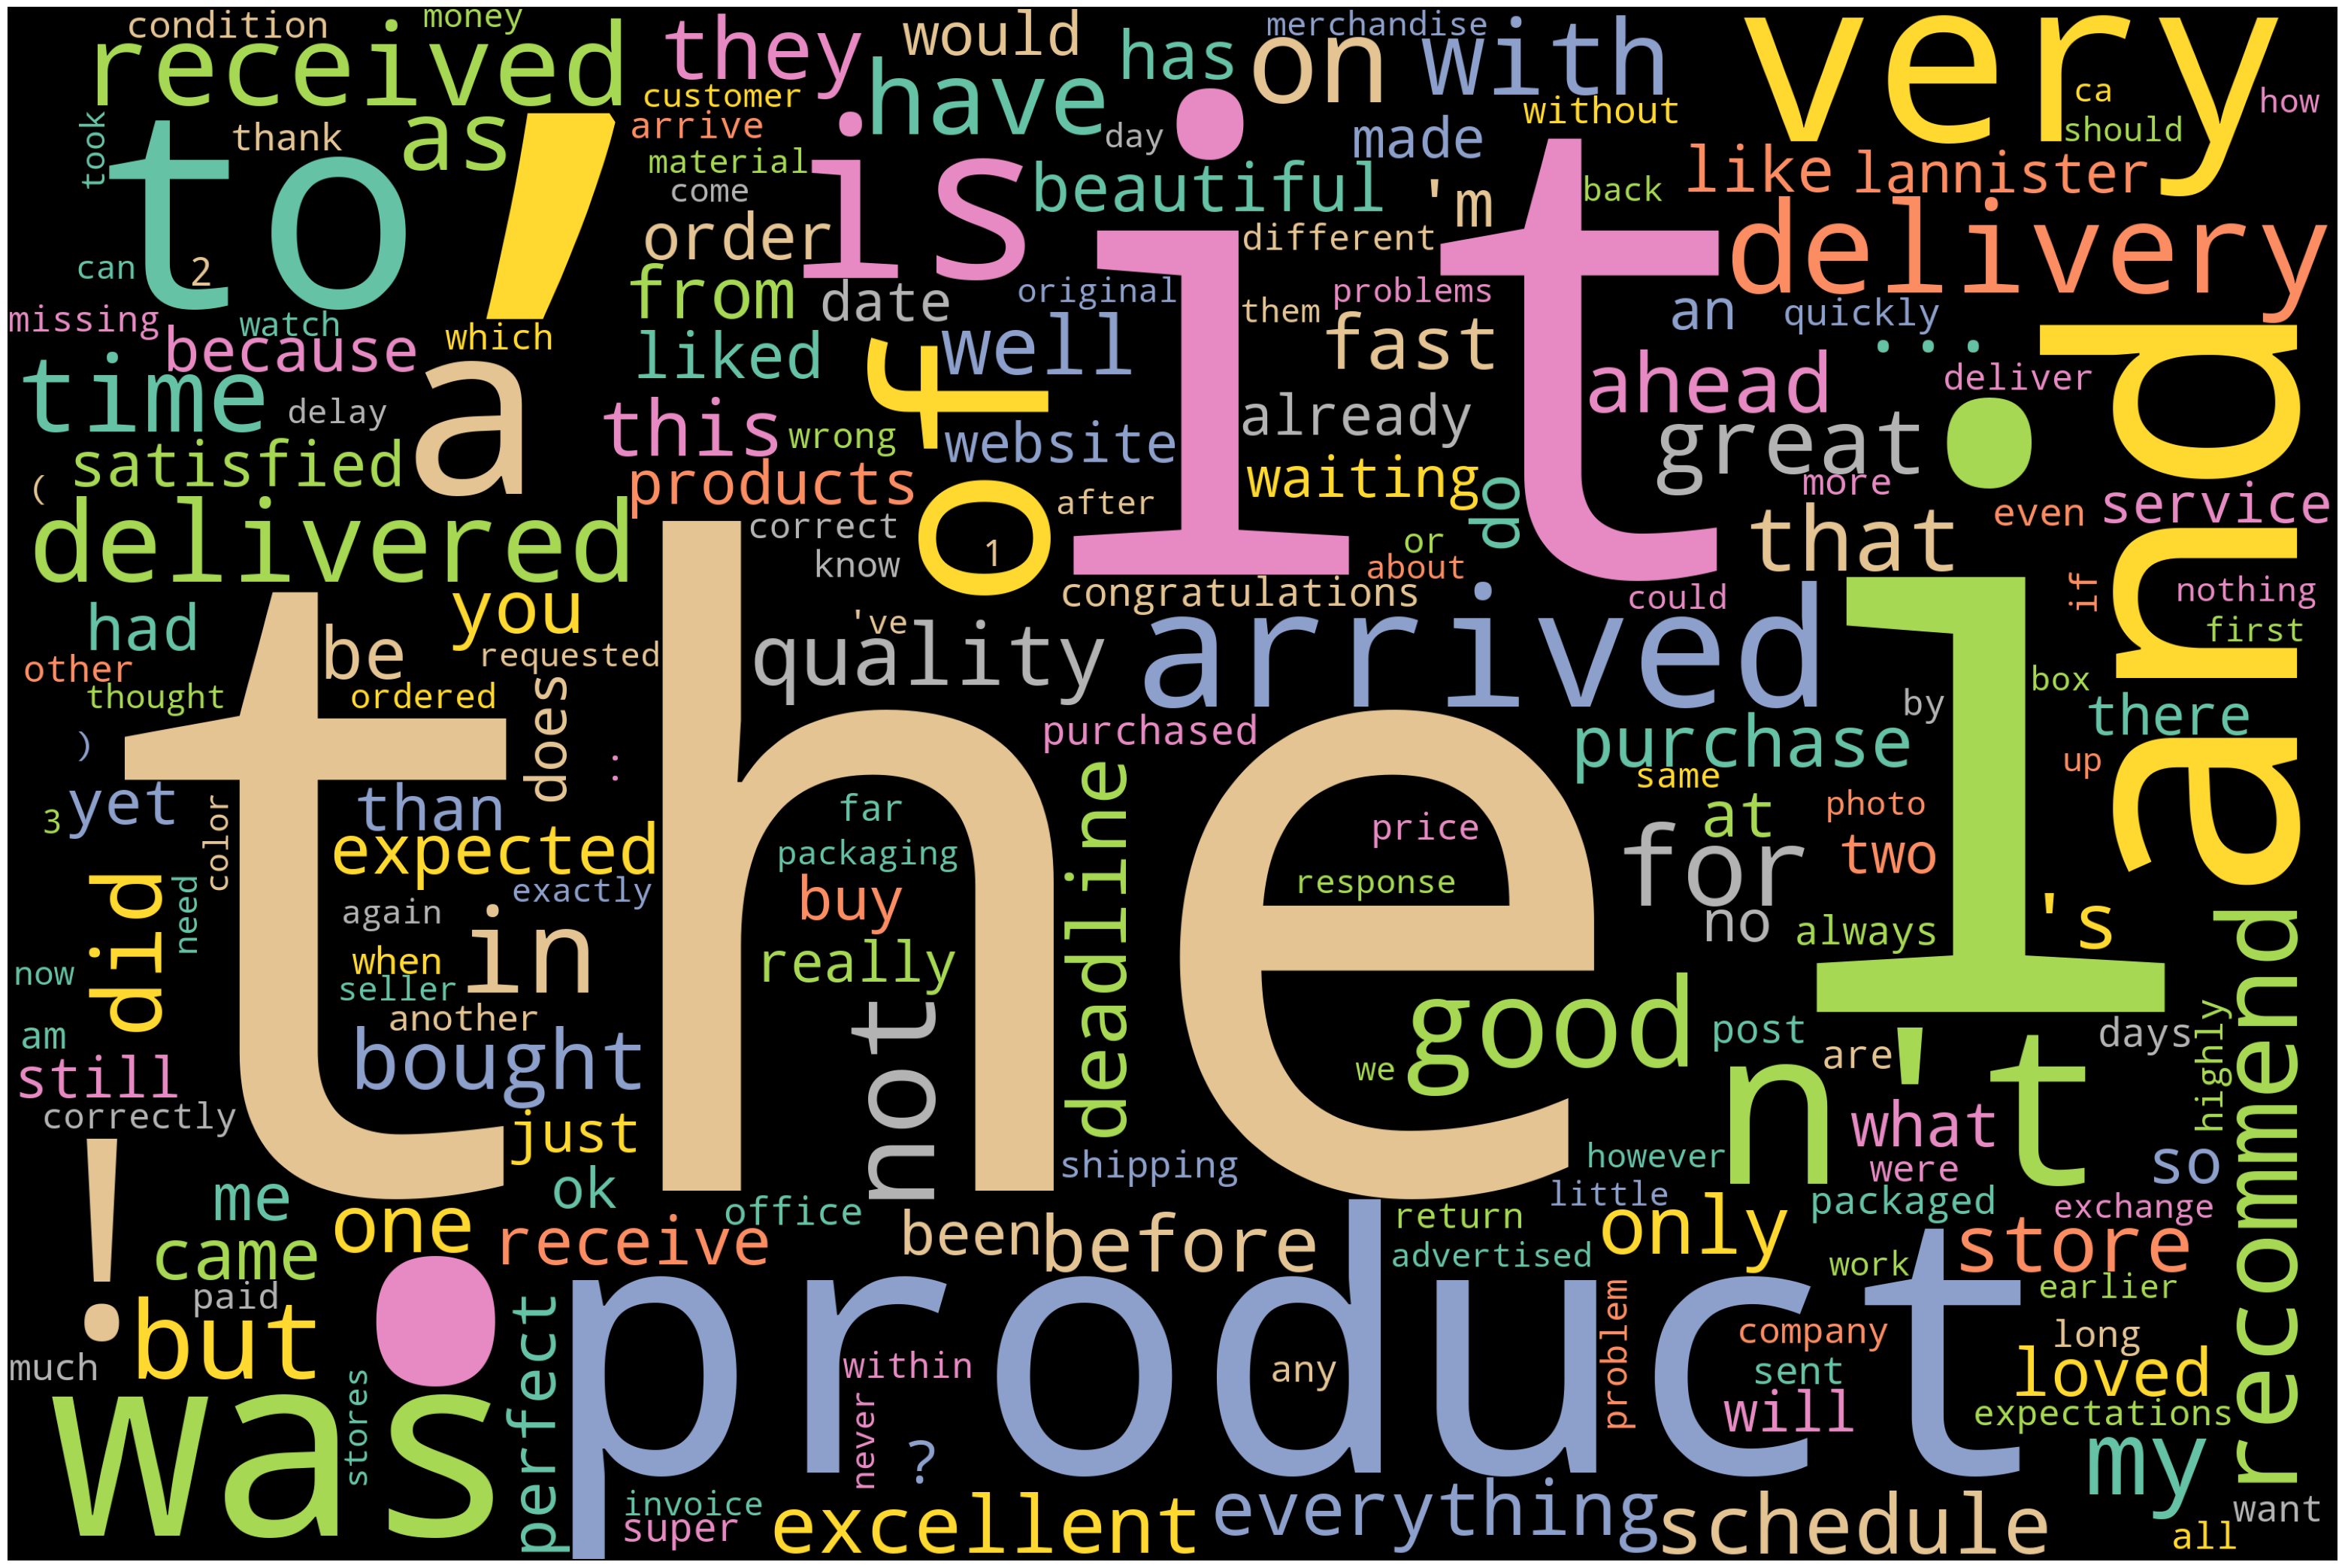

In [95]:
from wordcloud import WordCloud

# Define a function to plot word cloud
def plot_cloud(wordcloud):
    # Set figure size
    plt.figure(figsize=(40, 30))
    # Display image
    plt.imshow(wordcloud) 
    # No axis details
    plt.axis("off")

print(len(all_words_frequency))
# all_words_frequency = FreqDist(full_tokenized_words)

wordcloud = WordCloud(width=3000, height=2000, colormap='Set2',
                      collocations=False, max_words=200)
wordcloud.generate_from_frequencies(frequencies=all_words_frequency)

# Plot
plot_cloud(wordcloud)

## Removing Stop words and punctuations

In [96]:
from nltk.corpus import stopwords

# getting the stop words library from nltk.corpus of english type
stop_words=set(stopwords.words("english"))

print(stop_words)

filtered_sent=[]

for w in tokenized_words:
    w = w.lower()
    if w not in stop_words:
        filtered_sent.append(w)

print("Tokenized Sentence:",tokenized_words)
print("Filtered Sentence:",filtered_sent)

{'about', 'in', "aren't", 'ours', 'with', 'them', 'they', 'been', 'below', 'am', "you've", 'm', 'needn', 'yourself', 'just', 'shan', 'until', 'between', 'hers', "weren't", 'himself', 'y', 'down', 'out', 'be', 'are', 'after', "wouldn't", 'under', 've', 'it', 'did', 'from', 'of', 'before', 'only', 'a', 'didn', 'other', 'she', 'mightn', 'as', "you'll", 'at', "didn't", 'had', 'his', 'haven', 'but', "should've", 'hadn', 'won', 'mustn', 'how', 'he', 'few', 'my', 't', "mightn't", 'for', 'you', 'o', 'having', 'those', 'all', 'couldn', 'when', "she's", 'further', 'aren', 'too', 'than', 'this', 'now', "you're", "it's", 'then', 'through', 'once', 'up', "needn't", 'me', 'the', 'theirs', 'over', "hasn't", 'do', 'her', "shouldn't", 'does', 'by', 'have', 'some', 'your', 'ain', 'who', 'own', 'because', 'if', 'not', 'above', 'yours', 'off', 're', 'nor', 'myself', 'hasn', 'ma', 'wasn', "shan't", "won't", 'and', "you'd", 'being', 'while', 'has', 'doesn', 'both', 'will', 'him', 'themselves', 'can', 'very'

### Stemming
Stemming is a process of linguistic normalization, which reduces words to their word root word or chops off the derivational affixes. For example, connection, connected, connecting word reduce to a common word "connect".

We will be using the PortStemmer from the Gensim package. You will need to install the gensim library first. 

Type this command in jupyter or ananconda prompt: **pip install gensim**

In [97]:
#Import PorterStemmer
from gensim.parsing.porter import PorterStemmer
porter_stemmer = PorterStemmer()

stemmed_words=[]

for w in filtered_sent:
    stemmed_words.append(porter_stemmer.stem(w))

print("Filtered Sentence:",filtered_sent)
print("Stemmed Sentence:",stemmed_words)

Filtered Sentence: ['product', 'arrived', 'already', 'return', ',', 'defective', ',', 'hold', 'charge']
Stemmed Sentence: ['product', 'arriv', 'alreadi', 'return', ',', 'defect', ',', 'hold', 'charg']


In [98]:
#using punkt from nltk instead of gensim
from nltk.stem import PorterStemmer

#initialize python porter stemmer
porter_stemmer2= PorterStemmer()


stemmed_words2=[]
print("{0:20}{1:20}".format("--Word--","--Stem--"))
for word in filtered_sent:
    print ("{0:20}{1:20}".format(word, porter_stemmer2.stem(word)))



--Word--            --Stem--            
product             product             
arrived             arriv               
already             alreadi             
return              return              
,                   ,                   
defective           defect              
,                   ,                   
hold                hold                
charge              charg               


### Lemmatization
Lemmatization reduces words to their base word, which is linguistically correct lemmas. It transforms root word with the use of vocabulary and morphological analysis. Lemmatization is usually more sophisticated than stemming. Stemmer works on an individual word without knowledge of the context. For example, The word "better" has "good" as its lemma. This thing will miss by stemming because it requires a dictionary look-up

In [99]:
# Enter codes here
#Import Wordnet Lemmatizer
from nltk.stem.wordnet import WordNetLemmatizer
lem = WordNetLemmatizer()

#word = "better"
print("{0:20}{1:20}{2:20}".format("--Ori_Word--", "--Lemmatize--","--Stem--"))
for word in filtered_sent:
    print ("{0:20}{1:20}{2:20}".format(word,lem.lemmatize(word,"v"), porter_stemmer2.stem(word)))
    # print("Original Word:",word)
    # print("Lemmatized Word:",lem.lemmatize(word,"v"))
    # print("Stemmed Word:",porter_stemmer.stem(word))

--Ori_Word--        --Lemmatize--       --Stem--            
product             product             product             
arrived             arrive              arriv               
already             already             alreadi             
return              return              return              
,                   ,                   ,                   
defective           defective           defect              
,                   ,                   ,                   
hold                hold                hold                
charge              charge              charg               


# Actual command to clean

In [101]:
# Enter codes here

#Import libraries
import string
from nltk.stem.wordnet import WordNetLemmatizer
lem = WordNetLemmatizer()

#Specify stopword list
stopwords_english = set(stopwords.words('english'))

#Create a new list of words by removing stopwords and punctuation from all_words
all_words_clean = []
for word in all_words:
    if word not in stopwords_english and not word.isdigit():
        punc_free = ''.join([ch for ch in word if ch not in string.punctuation])
        if len(punc_free)>=2:
            # stem word to root word
            all_words_clean.append(lem.lemmatize(word,"v"))
        
# print the first 10 words
print (all_words_clean[:10])

['receive', 'well', 'stipulate', 'deadline', 'congratulations', 'lannister', 'store', 'love', 'shop', 'online']


## Visualising the Cleaned Word List
Below is the frequency distribution of the new list after removing stopwords, numbers and punctuation.

<FreqDist with 8980 samples and 260131 outcomes>

First 20 most frequently occurring words
[('arrive', 7454), ('receive', 6956), ('delivery', 6410), ('good', 6073), ('deliver', 5831), ('recommend', 5006), ('time', 4619), ('buy', 4222), ('great', 3295), ('purchase', 3278), ('like', 2959), ('store', 2911), ('schedule', 2902), ('quality', 2847), ('ahead', 2688), ('well', 2594), ('deadline', 2565), ('one', 2551), ('come', 2531), ('excellent', 2482)]


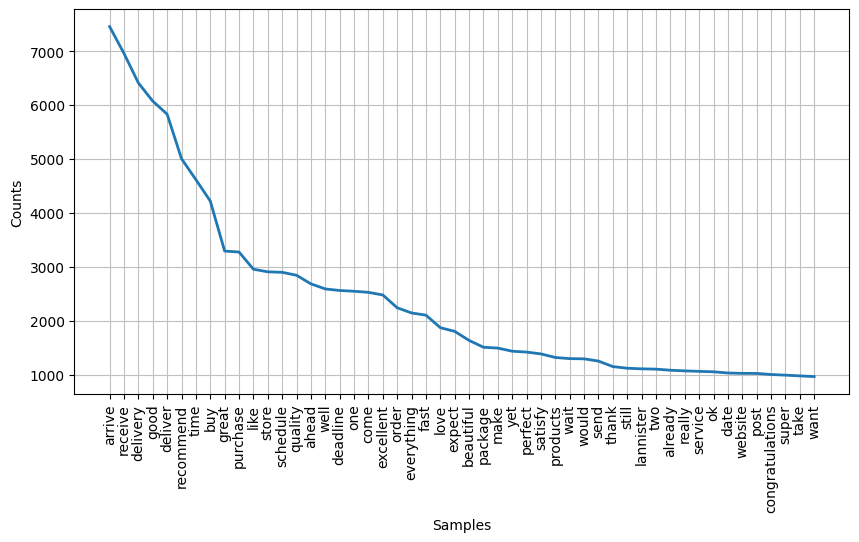

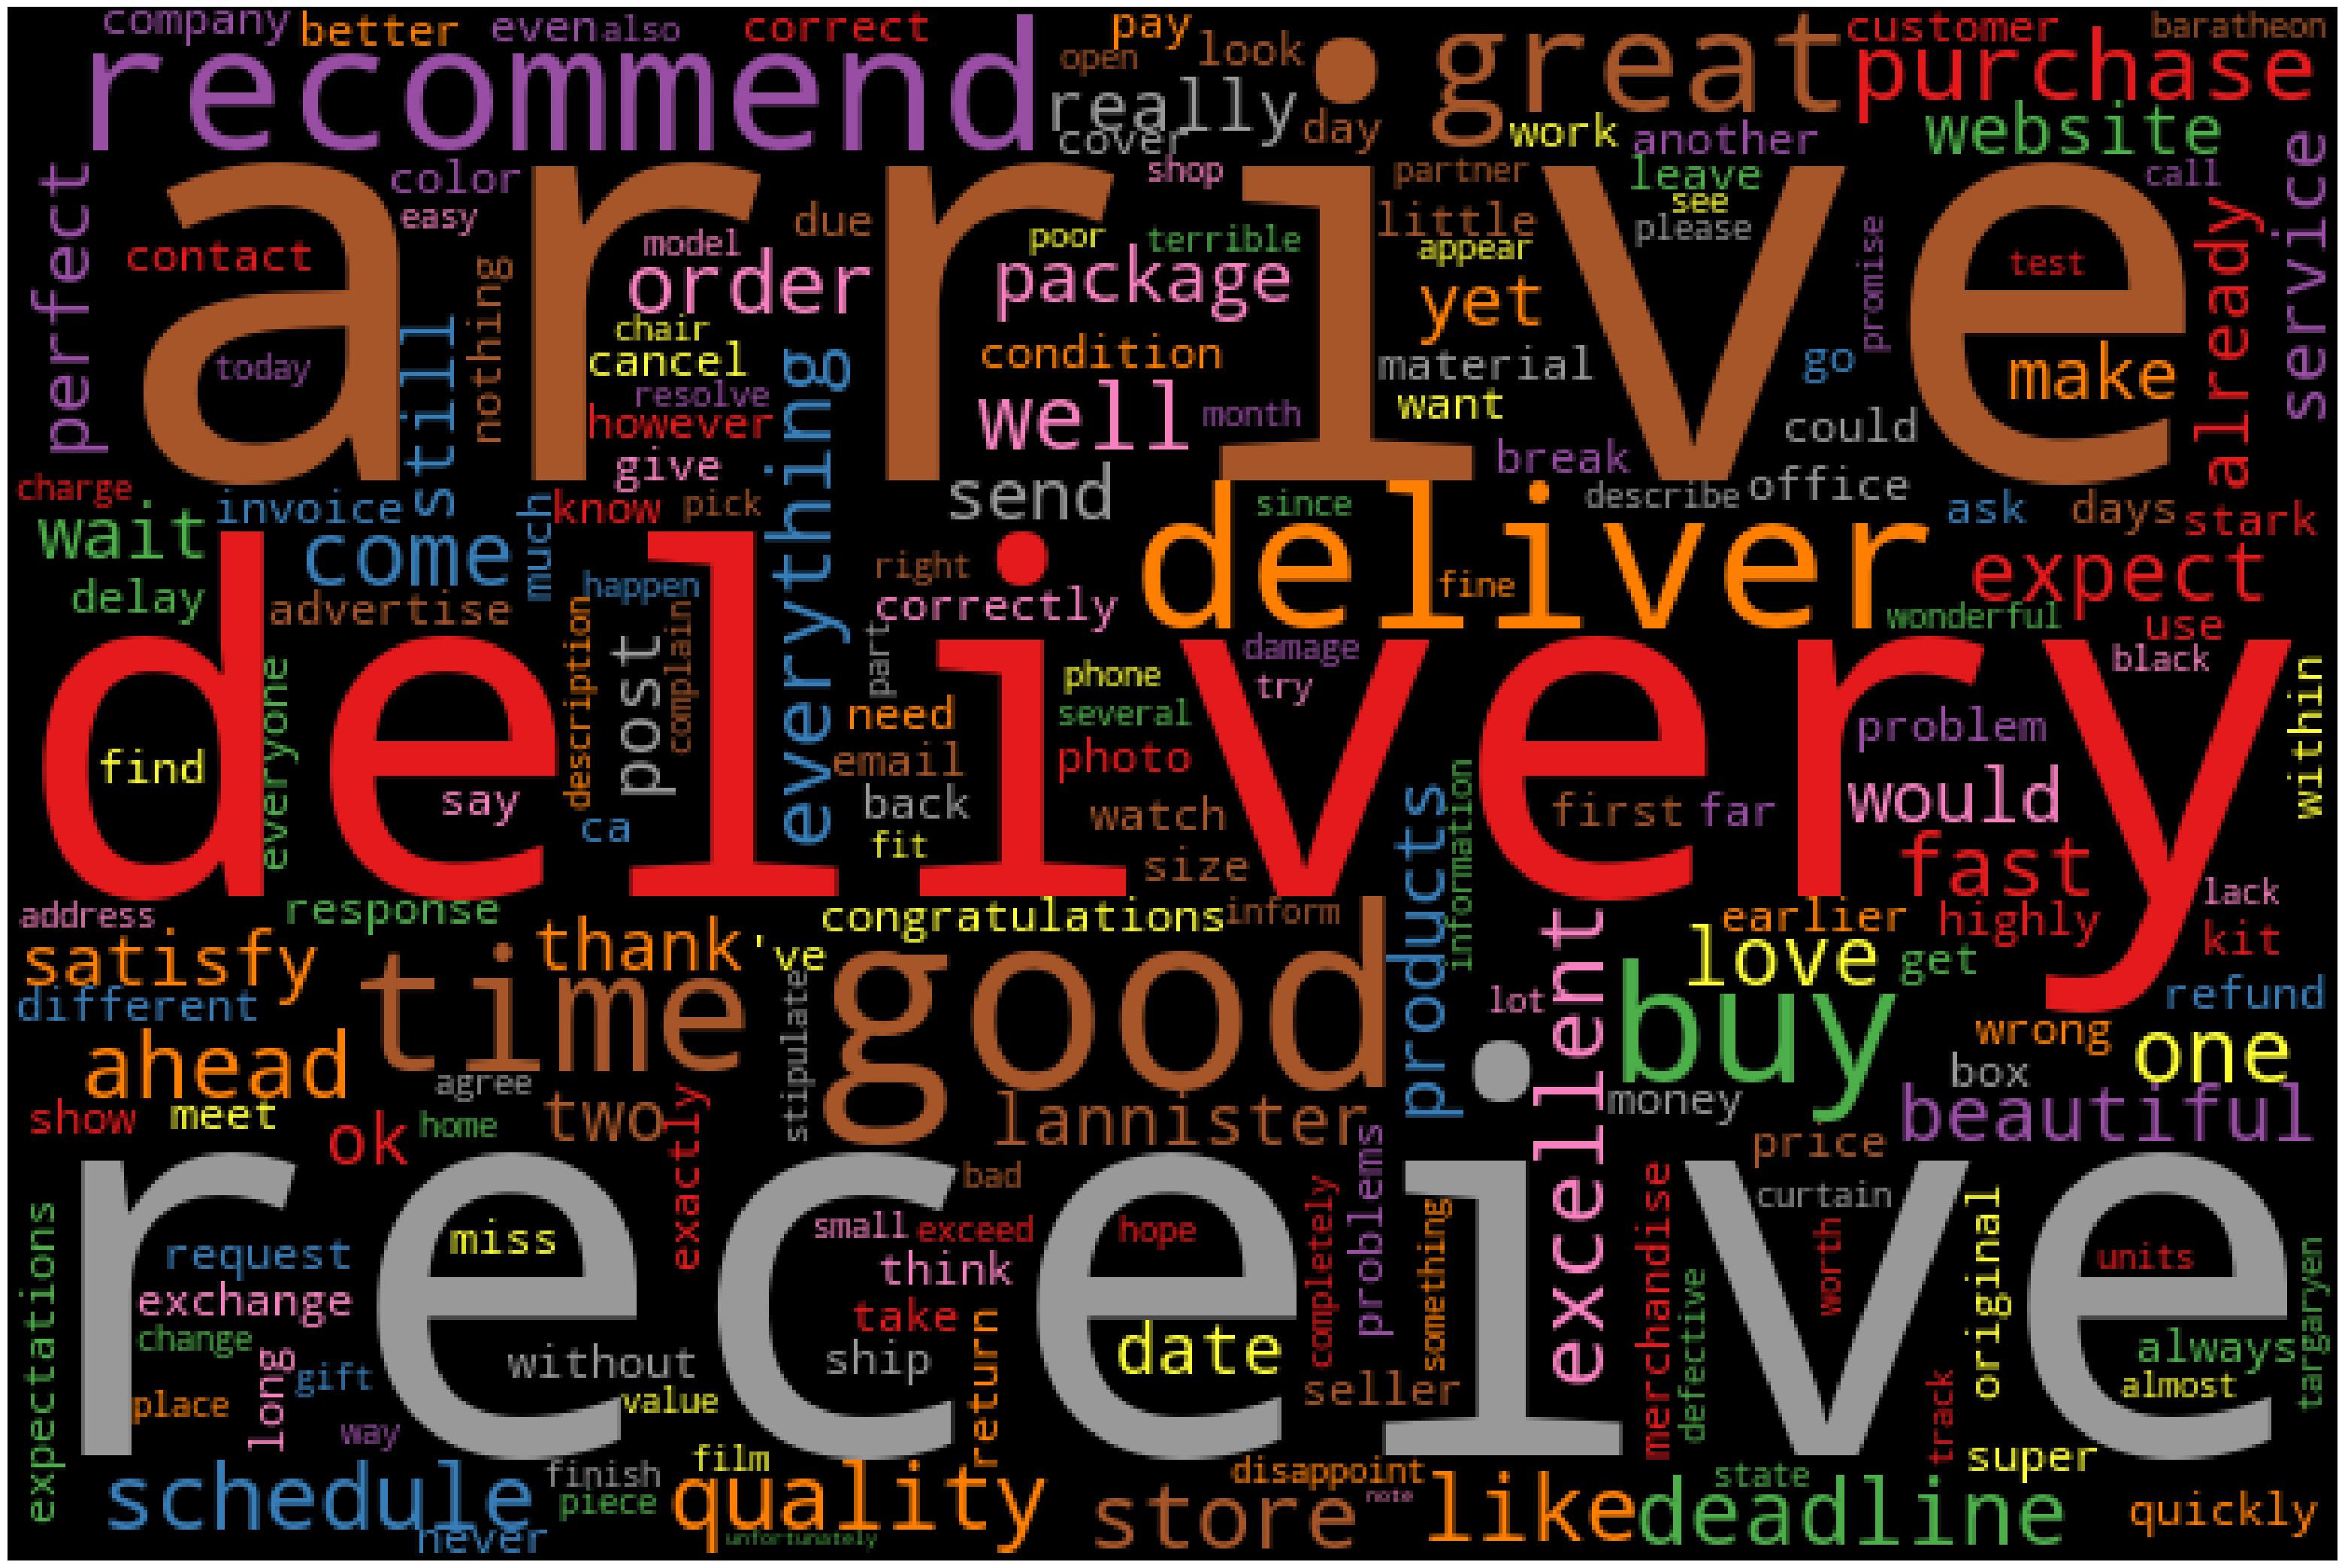

In [149]:
# Enter your codes here
all_words_frequency = FreqDist(all_words_clean)
print (all_words_frequency)

# print the first 20 most frequently occuring words
print ("\nFirst 20 most frequently occurring words")
print (all_words_frequency.most_common(20))

# Enter your codes here
plot_frequency(all_words_frequency)

wordcloud = WordCloud(width=600, height=400, colormap='Set1',
                      collocations=False)
wordcloud.generate_from_frequencies(frequencies=all_words_frequency)

# Plot
plot_cloud(wordcloud)

## Common Word Removal
Let's check the 50 most frequently occurring words in our text and decide to remove or retain.

Remove common words that are not of any use in the prediction of our data.

In [103]:
# Enter codes here

common_words = ["n't", "product"]
all_words_clean = [word for word in all_words_clean if word not in common_words]

<FreqDist with 8980 samples and 260131 outcomes>

First 20 most frequently occurring words
[('arrive', 7454), ('receive', 6956), ('delivery', 6410), ('good', 6073), ('deliver', 5831), ('recommend', 5006), ('time', 4619), ('buy', 4222), ('great', 3295), ('purchase', 3278), ('like', 2959), ('store', 2911), ('schedule', 2902), ('quality', 2847), ('ahead', 2688), ('well', 2594), ('deadline', 2565), ('one', 2551), ('come', 2531), ('excellent', 2482)]


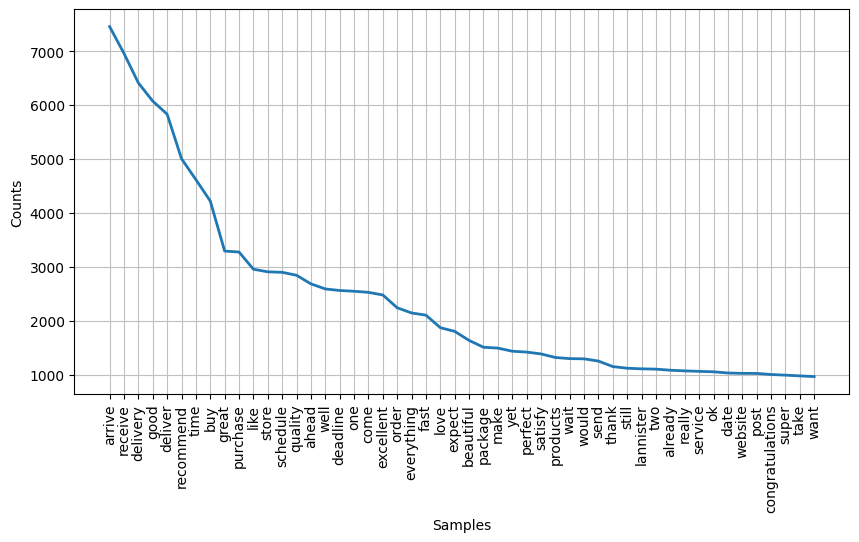

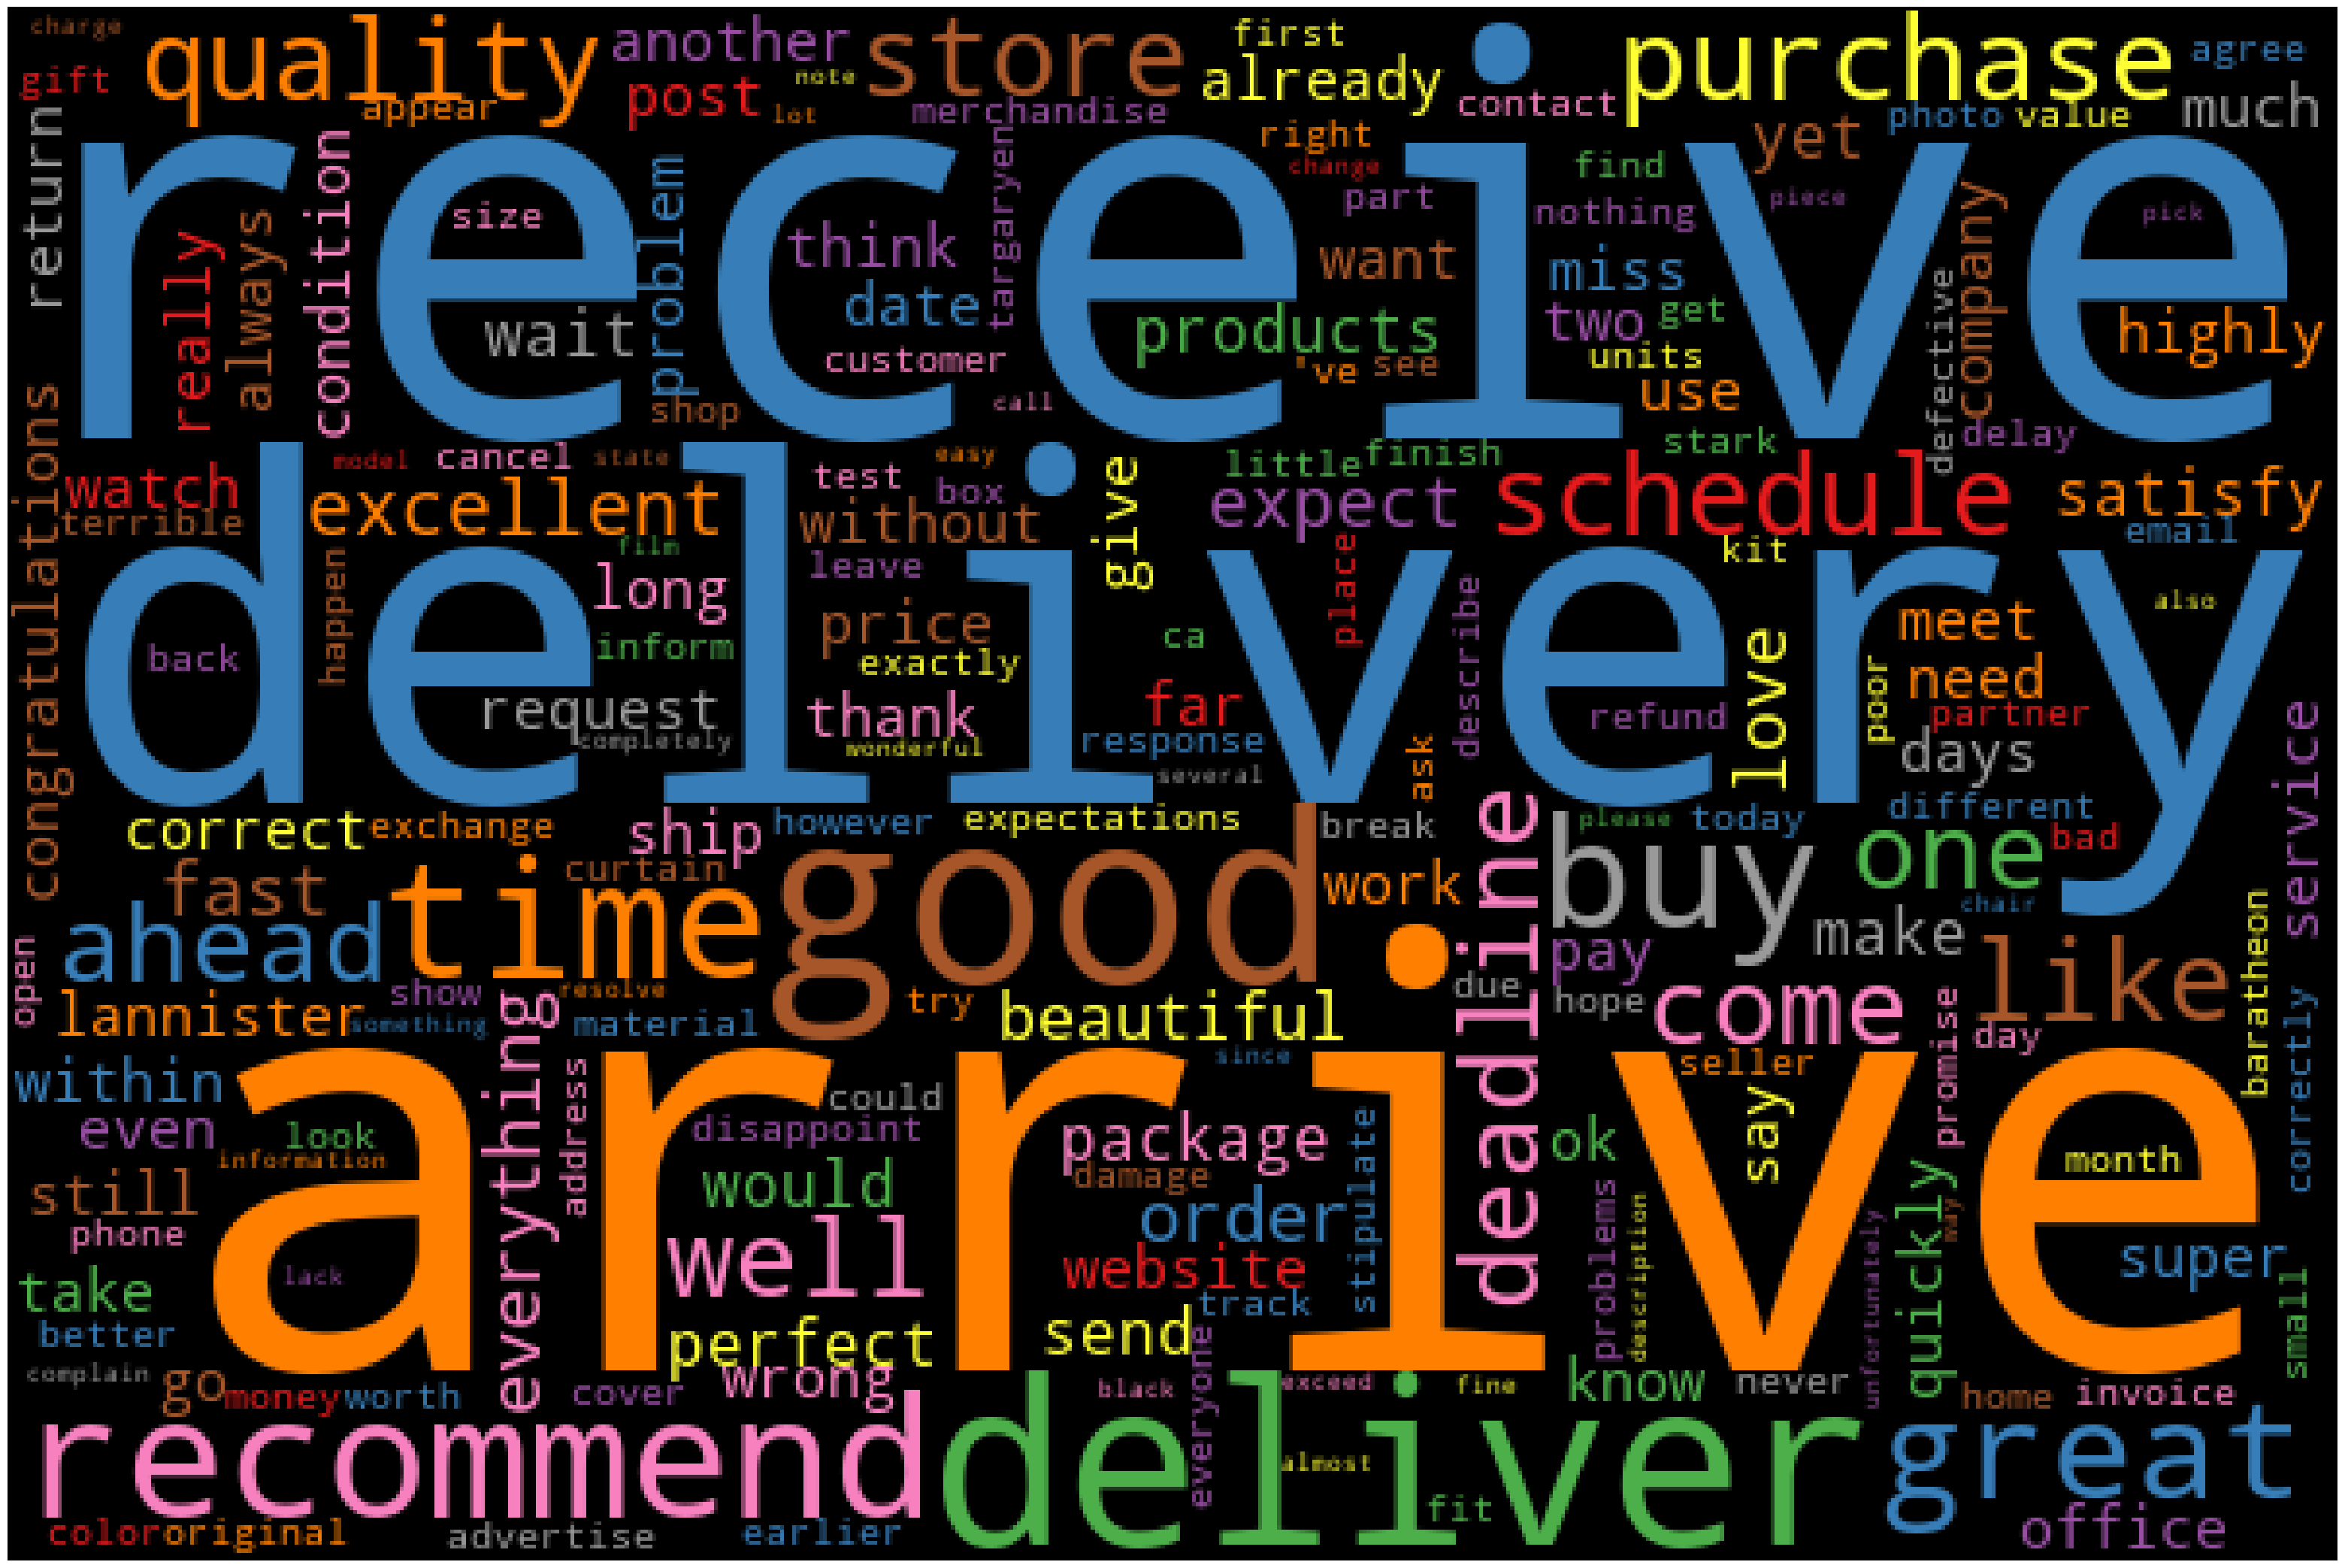

In [150]:
# Creates a list of word and the number of occurance(Frequency)
all_words_frequency = FreqDist(all_words_clean)
print (all_words_frequency)

# print the first 20 most frequently occuring words
print ("\nFirst 20 most frequently occurring words")
print (all_words_frequency.most_common(20))

# plot the distribution
plot_frequency(all_words_frequency)

wordcloud = WordCloud(width=600, height=400, colormap='Set1',
                      collocations=False)
wordcloud.generate_from_frequencies(frequencies=all_words_frequency)

# Plot
plot_cloud(wordcloud)

#--------------------------------------------------------------------------------------

In [105]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

cleaned_orders_reviews_df = pd.read_csv("clean_data/cleaned_orders_reviews.csv")

cleaned_orders_reviews_df.head()

review_id                          order_id  \
0  7bc2406110b926393aa56f80a40eba40  73fc7af87114b39712e6da79b0a377eb   
1  80e641a11e56f04c1ad469d5645fdfde  a548910a1c6147796b98fdf73dbeba33   
2  228ce5500dc1d8e020d8d1322874b6f0  f9e4b658b201a9f2ecdecbb34bed034b   
3  e64fb393e7b32834bb789ff8bb30750e  658677c97b385a9be170737859d3511b   
4  f7c4243c7fe1938f181bec41a392bdeb  8e6bfb81e283fa7e4f11123a3fb894f1   

   review_score review_comment_title  \
0             4                  NaN   
1             5                  NaN   
2             5                  NaN   
3             5                  NaN   
4             5                  NaN   

                              review_comment_message review_creation_date  \
0                                                NaN  2018-01-18 00:00:00   
1                                                NaN  2018-03-10 00:00:00   
2                                                NaN  2018-02-17 00:00:00   
3              Recebi bem antes do prazo estipulado.  2017-04-21 00:00:00   
4  Parabéns lojas lannister adorei comprar pela I...  2018-03-01 00:00:00   

  review_answer_timestamp                             cleaned_review_comment  \
0     2018-01-18 21:46:59                                                NaN   
1     2018-03-11 03:05:13                                                NaN   
2     2018-02-18 14:36:24                                                NaN   
3     2017-04-21 22:02:06              Recebi bem antes do prazo estipulado.   
4     2018-03-02 10:26:53  Parabéns lojas lannister adorei comprar pela I...   

                           translated_review_comment translated_comment_title  
0                                                NaN                      NaN  
1                                                NaN                      NaN  
2                                                NaN                      NaN  
3  I received it well before the stipulated deadl...                      NaN  
4  Congratulations lannister stores I loved shopp...                      NaN

# Encoding Sentiments

In [108]:
# print(cleaned_orders_reviews_df.shape)
# null_cleaned_orders_reviews_df=cleaned_orders_reviews_df[cleaned_orders_reviews_df['translated_review_comment'].isna()]
cleaned_orders_reviews_df.dropna(subset=['translated_review_comment'],inplace=True)
print(cleaned_orders_reviews_df.shape)
# print(null_cleaned_orders_reviews_df.shape)
# print(null_cleaned_orders_reviews_df.head())

cleaned_orders_reviews_df = cleaned_orders_reviews_df[cleaned_orders_reviews_df['review_score']!= 3]
cleaned_orders_reviews_df['Positively_Rated'] = np.where(cleaned_orders_reviews_df['review_score']>3, 1, 0)
cleaned_orders_reviews_df.head(10)
cleaned_orders_reviews_df.shape

(41601, 10)


(37948, 11)

In [109]:
pd.crosstab(index = cleaned_orders_reviews_df['Positively_Rated'], columns="Total count")

col_0             Total count
Positively_Rated             
0                       11399
1                       26549

## Splitting Data in to Train and Test Set

In [110]:
from sklearn.model_selection import train_test_split
# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(cleaned_orders_reviews_df['translated_review_comment'], cleaned_orders_reviews_df['Positively_Rated'], test_size=0.2,random_state=0)

Now perform individual reviews using Count Vectorizer

In [111]:
from sklearn.feature_extraction.text import CountVectorizer
# Fit the CountVectorizer to the training data
vect = CountVectorizer().fit(X_train)

## Document Term Matrix

This s a mathematical matrix that describes the frequency of terms that occur in a collection of documents.
There are various schemes for determining the value, one such scheme is **tf-idf**

In [112]:
# transform the documents in the training data to a document-term matrix
X_train_vectorized = vect.transform(X_train)

## Classification Model: Logistic Regression

In [113]:
from sklearn.linear_model import LogisticRegression,SGDClassifier
model = LogisticRegression()
model.fit(X_train_vectorized, y_train)

LogisticRegression()

## Model Scoring : Logistic Regression



In [114]:
from sklearn.metrics import roc_curve, roc_auc_score, auc
predictions = model.predict(vect.transform(X_test))
print('AUC: ', roc_auc_score(y_test, predictions))
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, predictions)
roc_auc = auc(false_positive_rate, true_positive_rate)

AUC:  0.9133990117462453


In [133]:
# Fit the CountVectorizer to the training data specifiying a 
# minimum document frequency of 5 and extracting 1-gram and 2-gram
vect = CountVectorizer(min_df=5, ngram_range=(1,2)).fit(X_train)
X_train_vectorized = vect.transform(X_train)
model = LogisticRegression()
model.fit(X_train_vectorized, y_train)
predictions = model.predict(vect.transform(X_test))
# false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, predictions)
# roc_auc = auc(false_positive_rate, true_positive_rate)

print('AUC: ', roc_auc_score(y_test, predictions))

AUC:  0.9210266345062933


In [132]:
print(predictions)

[0 1 1 ... 1 0 0]


In [146]:
# Define a function to preprocess user input text
def preprocess_text(text):
    # Apply any necessary preprocessing steps, such as lowercasing, removing punctuation, etc.
    preprocessed_text = text.lower()  # Example: convert text to lowercase
    return preprocessed_text

user_input_text=input("Please input a sample review to test our model")

# Preprocess the user input text
preprocessed_user_input = preprocess_text(user_input_text)

# Vectorize the preprocessed user input text using the same CountVectorizer
user_input_vectorized = vect.transform([preprocessed_user_input])

# Predict sentiment using the trained model
prediction = model.predict(user_input_vectorized)

# Probability of positive sentiment
probability_positive = model.predict_proba(user_input_vectorized)[:, 1]

# Print the prediction and probability
if prediction[0] == 1:
    print("The model predicts positive sentiment.")
else:
    print("The model predicts negative sentiment.")
print("Probability of positive sentiment:", probability_positive[0])

The model predicts positive sentiment.
Probability of positive sentiment: 0.9838608868947708
